In [24]:
import pandas as pd
import numpy as np

In [25]:
# Load data
df = pd.read_csv("SMSSpamCollection.csv", encoding="latin1")
df.columns = ["label", "message"]

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [26]:
import gensim
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

In [27]:
def preprocess(text):
    return simple_preprocess(text)

# Tokenize all messages
df["tokens"] = df["message"].apply(preprocess)

In [28]:
# build word2vec model
sentences = df["tokens"].tolist()

w2v_model = gensim.models.Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

w2v_model.train(sentences, total_examples=len(sentences), epochs=10)


(647892, 787150)

In [29]:
def sentence_vector(tokens):
    vectors = []
    for word in tokens:
        if word in w2v_model.wv:
            vectors.append(w2v_model.wv[word])
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

X = np.array([sentence_vector(tokens) for tokens in df["tokens"]])

In [ ]:
# Convert labels to binary
df["label"] = df["label"].map({"ham": 0, "spam": 1})
Y = df["label"].values


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [31]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [33]:
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, pred))
print(classification_report(Y_test, pred))

Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       954
           1       0.92      0.86      0.89       161

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)

In [35]:
cm

array([[942,  12],
       [ 23, 138]], dtype=int64)

<Axes: >

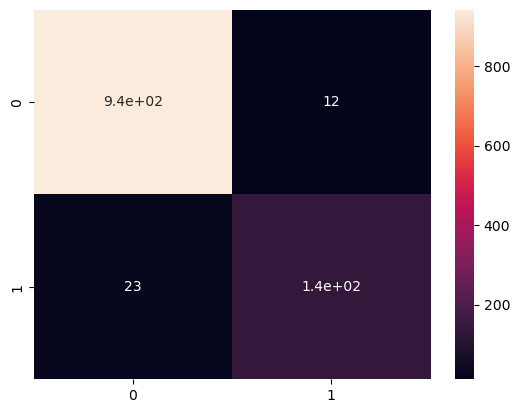

In [36]:
import seaborn as sns
sns.heatmap(cm,annot=True)